<a href="https://colab.research.google.com/github/MaddoSaru/Personal/blob/master/Data%20Analyst%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definición del problema**

In [1]:
# Test Data Analyst

# Preguntas a responder

# 1.	El picking speed a nivel de orden, de producto, y de shoppers. ¿Cuál crees que es el más importante para la operación de Cornershop? ¿Por qué?
# 2.	Picking speed vs cantidad de productos pickeados por orden. ¿Hay alguna relación entre estas variables? ¿Por qué se podría dar esta relación?

# TIP
# Picking speed = Tiempo de compra por producto

**Instalación e importación de paquetes a utilizar**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

**Lectura de datos**

In [3]:
opt1 = pd.read_csv("orders_pickers_times_1.csv")
opt2 = pd.read_csv("orders_pickers_times_2.csv")
op = pd.read_csv("orders_products.csv")
op_nueva = pd.read_csv("orders_products.csv")

**Pre procesamiento de datos**

In [4]:
# 1 Transformar datos de tiempo en string a formato datetime

opt1['Tiempo_inicio'] = pd.to_datetime(opt1['picking_shopping_time'], format="%Y-%m-%dT%H:%M:%S")
opt1['Tiempo_pago'] = pd.to_datetime(opt1['picking_checkout_time'], format="%Y-%m-%dT%H:%M:%S")

opt2['Tiempo_inicio'] = pd.to_datetime(opt2['picking_shopping_time'], format="%Y-%m-%dT%H:%M:%S")
opt2['Tiempo_pago'] = pd.to_datetime(opt2['picking_checkout_time'], format="%Y-%m-%dT%H:%M:%S")

# 2 Eliminar columna sin nombre del dataset de productos por orden

op = op.drop(["Unnamed: 0"], axis = 1)

In [5]:
# Revisión de datos faltantes opt1

opt1.isnull().sum()

order_id                 0
picking_checkout_time    0
picking_shopping_time    0
shopper_picking_id       0
Tiempo_inicio            0
Tiempo_pago              0
dtype: int64

In [6]:
# Revisión de datos faltantes opt2

opt2.isnull().sum()

order_id                 0
picking_checkout_time    0
picking_shopping_time    0
shopper_picking_id       0
Tiempo_inicio            0
Tiempo_pago              0
dtype: int64

In [7]:
# Revisión de datos faltantes op

op.isnull().sum()

order_id      1
product_id    1
dtype: int64

In [8]:
# Eliminar fila con el product_id nulo, ya que no es representativo en el análisis

op = op.dropna()

# Verificar el cambio

op.isnull().sum()

order_id      0
product_id    0
dtype: int64

**Revisión del comportamiento de la data**

In [9]:
# Visualización del dataset de tiempos de pickeo en las órdenes (1)

opt1.head(5)

,order_id,picking_checkout_time,picking_shopping_time,shopper_picking_id,Tiempo_inicio,Tiempo_pago
0,10915601,2020-04-16T15:51:36.399351Z,2020-04-16T14:20:37.435806Z,1450408,2020-04-16 14:20:37.435806+00:00,2020-04-16 15:51:36.399351+00:00
1,10915608,2020-04-16T17:40:56.89845Z,2020-04-16T16:47:02.837472Z,2596949,2020-04-16 16:47:02.837472+00:00,2020-04-16 17:40:56.898450+00:00
2,10915609,2020-04-16T17:52:54.520687Z,2020-04-16T16:36:17.784052Z,2034370,2020-04-16 16:36:17.784052+00:00,2020-04-16 17:52:54.520687+00:00
3,10915610,2020-04-16T22:25:32.21051Z,2020-04-16T21:25:02.171791Z,506686,2020-04-16 21:25:02.171791+00:00,2020-04-16 22:25:32.210510+00:00
4,10915611,2020-04-16T16:31:15.711795Z,2020-04-16T15:58:08.498429Z,1431839,2020-04-16 15:58:08.498429+00:00,2020-04-16 16:31:15.711795+00:00


In [10]:
# Visualización del dataset de tiempos de pickeo en las órdenes (2)

opt2.head(5)

,order_id,picking_checkout_time,picking_shopping_time,shopper_picking_id,Tiempo_inicio,Tiempo_pago
0,17671385,2020-08-19T15:50:20.210972Z,2020-08-19T15:09:25.130534Z,2029780,2020-08-19 15:09:25.130534+00:00,2020-08-19 15:50:20.210972+00:00
1,17671496,2020-08-19T13:14:20.92528Z,2020-08-19T12:42:35.96972Z,2484115,2020-08-19 12:42:35.969720+00:00,2020-08-19 13:14:20.925280+00:00
2,17671840,2020-08-19T14:04:01.111915Z,2020-08-19T13:18:17.451617Z,2615074,2020-08-19 13:18:17.451617+00:00,2020-08-19 14:04:01.111915+00:00
3,17672076,2020-08-19T15:44:23.596217Z,2020-08-19T15:10:11.141956Z,2649782,2020-08-19 15:10:11.141956+00:00,2020-08-19 15:44:23.596217+00:00
4,17672362,2020-08-19T14:57:33.600806Z,2020-08-19T13:55:34.026273Z,4096604,2020-08-19 13:55:34.026273+00:00,2020-08-19 14:57:33.600806+00:00


In [11]:
# Visualización del dataset de productos por orden

op.head(5)

,order_id,product_id
0,13310692.0,421766.0
1,13112721.0,423254.0
2,11322551.0,451837.0
3,13356654.0,148679.0
4,10582454.0,708069.0


**Procesamiento de datos**

In [12]:
# Calcular cantidad de productos con orden

op = op.groupby(["order_id"]).count()

# Revisar operación

op.head(5)

,product_id
order_id,
10412027.0,7
10433676.0,25
10433964.0,15
10434046.0,25
10434089.0,15


In [13]:
# Cruce de dataframes

opt1 = pd.merge(left=opt1,right=op, left_on='order_id', right_on='order_id')
opt2 = pd.merge(left=opt2,right=op, left_on='order_id', right_on='order_id')

opt1 = opt1.rename(columns = {"product_id" : "Cantidad_productos"})
opt2 = opt2.rename(columns = {"product_id" : "Cantidad_productos"})

In [14]:
# Verificar que no existen similitudes en los campos (order_id repetidas)

opt1.merge(opt2, how = 'inner')

,order_id,picking_checkout_time,picking_shopping_time,shopper_picking_id,Tiempo_inicio,Tiempo_pago,Cantidad_productos


**Cálculo de nuevas variables**

In [15]:
# Tiempo utilizado en minutos

opt1["diferencia_tiempos"] = (opt1["Tiempo_pago"]-opt1["Tiempo_inicio"])
opt2["diferencia_tiempos"] = (opt2["Tiempo_pago"]-opt2["Tiempo_inicio"])

opt1["diferencia_tiempos"]= (opt1["diferencia_tiempos"].dt.total_seconds())/60
opt2["diferencia_tiempos"]= (opt2["diferencia_tiempos"].dt.total_seconds())/60


In [16]:
opt = pd.concat([opt1,opt2], axis=0)

In [17]:
# Generar variables

# Picking speed por producto

opt["ps_producto"] = opt["diferencia_tiempos"]/opt['Cantidad_productos']

# Picking speed por orden (el dataframe está agurpado por orden)

opt["ps_orden"] = opt['diferencia_tiempos']

# Picking speed por shopper

opt["ps_shopper"] = opt.groupby(["shopper_picking_id"]).sum()["diferencia_tiempos"]/opt.groupby(["shopper_picking_id"]).sum()["Cantidad_productos"]

In [18]:
# Gráfico de producto vs picking speed por producto

# opt_por_producto = pd.merge(left=opt,right=op_nueva, left_on='order_id', right_on='order_id', left_index=True)

# Agrupar por producto la base de datos. Se toma en consideración la media del picking speed

# opt_por_producto = opt_por_producto.rename_axis("index").reset_index()

# opt_por_producto = opt_por_producto.groupby(["product_id"]).mean()

# plt.plot(opt_por_producto["product_id"], opt_por_producto["ps_producto"])
# plt.title('producto vs ps_producto')
# plt.xlabel('Producto')
# plt.ylabel('ps_producto')
# plt.show()

# El gráfico sugiere agrupar la data, ya que son muchos productos a graficar. Se detiene el entorno de ejecucion por exceso de ram utilizada en el proceso

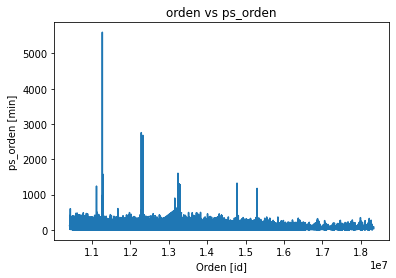

In [43]:
# Gráfico de órdenes vs picking speed por orden

plt.plot(opt["order_id"], opt["ps_orden"])
plt.title('orden vs ps_orden')
plt.xlabel('Orden [id]')
plt.ylabel('ps_orden [min]')
plt.show()

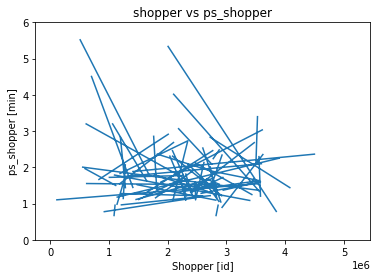

In [44]:
# Gráfico de shoppers vs picking speed por shopper

plt.plot(opt["shopper_picking_id"], opt["ps_shopper"])
plt.title('shopper vs ps_shopper')
plt.xlabel('Shopper [id]')
plt.ylabel('ps_shopper [min]')
plt.ylim((0,6))
plt.show()

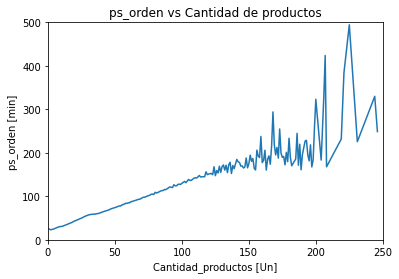

In [45]:
# Picking speed vs Cantidad de productos

opt_new = opt.groupby(["Cantidad_productos"]).mean()
opt_new = opt_new.reset_index()

plt.plot(opt_new["Cantidad_productos"], opt_new["ps_orden"])
plt.title('ps_orden vs Cantidad de productos')
plt.xlabel('Cantidad_productos [Un]')
plt.ylabel('ps_orden [min]')
plt.xlim((0,250))
plt.ylim((0,500))
plt.show()